SENTIMENT ANALYSIS ON F

IMPORTING LIBRARIRES:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download ('averaged_perceptron_tagger')
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.wsd import lesk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from nltk import re
!pip install wordcloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
!pip install vaderSentiment

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


 Data Gathering and Preprocessing:

In [ ]:
#creating a dataframe :
df=pd.read_csv("flipkart_product.csv",encoding="unicode_escape")
df

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good


In [ ]:
#Assigning a ID variable :
df = df.assign(Id=range(len(df)))


In [ ]:
#printing the shape of the dataframe :
df.shape

(189874, 6)

In [ ]:
#checking the info of the dataframe :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
 5   Id           189874 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 8.7+ MB


In [ ]:
#Describing the dataframe :
df.describe()

,Id
count,189874.000000
mean,94936.500000
std,54812.046843
min,0.000000
25%,47468.250000
50%,94936.500000
75%,142404.750000
max,189873.000000


In [ ]:
#checking the null values :
null_df=pd.DataFrame({'Count':df.isnull().sum(),'Percentage':df.isnull().sum()/df.shape[0]})
null_df

,Count,Percentage
ProductName,0,0.000000
Price,1,0.000005
Rate,1,0.000005
Review,4,0.000021
Summary,14,0.000074
Id,0,0.000000


In [ ]:
#Dropping the null values :
df.dropna(inplace=True)


#checking for  null values after dropping the null values :
null_df=pd.DataFrame({'Count':df.isnull().sum(),'Percentage':df.isnull().sum()/df.shape[0]})
null_df

,Count,Percentage
ProductName,0,0.0
Price,0,0.0
Rate,0,0.0
Review,0,0.0
Summary,0,0.0
Id,0,0.0


In [ ]:
#displaying the summary and review column :
pd.DataFrame(df[['Summary','Review']])

,Summary,Review
0,Great cooler.. excellent air flow and for this...,Super!
1,Best budget 2 fit cooler. Nice cooling,Awesome
2,The quality is good but the power of air is de...,Fair
3,Very bad product it's a only a fan,Useless product
4,Ok ok product,Fair
...,...,...
189868,Good,Terrific
189869,Thanks,Terrific
189870,Good,Terrific
189871,Super,Just wow!


In [ ]:
#Processing the text :

def clean_text(df):
  df=word_tokenize(df)
  df="".join(df)
  df=[char for char in df if char not in string.punctuation]   #Remove Punctuations
  df="".join(df)
  df=[word for word in df.split() if word.lower() not in stopwords.words('english')]   #Remove Stopwords
  return "".join(df)

In [ ]:
#Renaming the Summary column as Cleaned_text :

df['cleaned_text']=df['Summary'].apply(clean_text)
df['cleaned_text'].head()

0    GreatcoolerexcellentairflowandforthispriceItss...
1                      Bestbudget2fitcoolerNicecooling
2             Thequalityisgoodbutthepowerofairisdecent
3                           Verybadproductitsaonlyafan
4                                          Okokproduct
Name: cleaned_text, dtype: object

In [ ]:
#Process the data :
def clean(text):
    text=str(text).lower()
    text=re.sub("\[.*?\]","",text)
    text=re.sub("https?://\S+|www\.\S+","",text)
    text=re.sub("<.*?>+","",text)
    text=re.sub("[%s]"% re.escape(string.punctuation),"",text)
    text=re.sub("\n","",text)
    text=re.sub("\w*\d\w*","",text)
    text=[word for word in text.split(" ") if word not in stopwords.words('english')]
    text=" ".join(text)
    return text


In [ ]:
df.drop(columns=['Price','Summary'],inplace=True)

In [ ]:
df["Review"] = df["Review"].apply(clean)
df['ProductName']=df['ProductName'].apply(clean)
df.head()

,ProductName,Rate,Review,Id,cleaned_text
0,candes l roompersonal air coolerÿÿwhite black...,5,super,0,GreatcoolerexcellentairflowandforthispriceItss...
1,candes l roompersonal air coolerÿÿwhite black...,5,awesome,1,Bestbudget2fitcoolerNicecooling
2,candes l roompersonal air coolerÿÿwhite black...,3,fair,2,Thequalityisgoodbutthepowerofairisdecent
3,candes l roompersonal air coolerÿÿwhite black...,1,useless product,3,Verybadproductitsaonlyafan
4,candes l roompersonal air coolerÿÿwhite black...,3,fair,4,Okokproduct


In [ ]:
df=df.drop(df[df['Review']=='Nan'].index,inplace=True)

In [ ]:
# Create a function to calculate Sentiment scores for each text :

def generate_polarity(text):
    sentiment = TextBlob(text).sentiment
    return sentiment

# Apply the function to processed data :

sentiment = df['Review'].apply(generate_polarity)
sentiment = sentiment.to_frame()
sentiment.head()

,Review
0,"(0.3333333333333333, 0.6666666666666666)"
1,"(1.0, 1.0)"
2,"(0.7, 0.9)"
3,"(-0.5, 0.2)"
4,"(0.7, 0.9)"


In [ ]:
# Use the first element as Polarity :
sentiment['polarity'] = sentiment['Review'].apply(lambda x:x[0])

# Use the second element as Subjectivity :
sentiment ['subjectivity'] = sentiment['Review'].apply(lambda x:x[1])

In [ ]:
# Add two columns to DataFrame for Polarity and Subjectivity score respectively :

df['polarity'] = sentiment['polarity']
df['subjectivity'] = sentiment['subjectivity']

In [ ]:
# Encode polarity into 'positive', 'negative' and 'neutral' based on the score :

df['polarity_encoded'] = ['positive' if x > 0 else 'negative' if x < 0 else 'neutral' for x in df['polarity']]

# Print the number of tweets of each category of polarity
df['polarity_encoded'].value_counts()

positive    123369
neutral      52735
negative     13753
Name: polarity_encoded, dtype: int64

In [ ]:
#The Rating column of the data contains the ratings given by every reviewer.
# So lets have a look at how most of the people rate the products they buy from the Flipcart :

rating=df['Rate'].value_counts()
rating

5                                                              108684
4                                                               39649
1                                                               19607
3                                                               15680
2                                                                6233
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)          1
Bajaj DX 2 L/W Dry Iron                                             1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)         1
s                                                                   1
Name: Rate, dtype: int64

In [ ]:
#Printing the most positive review and most negative review :

print("The most Positive Review :",df.iloc[df['polarity'].idxmax()]['Review'])
print("The most Negative Review :",df.iloc[df['polarity'].idxmin()]['Review'])

The most Positive Review : awesome
The most Negative Review : worst experience ever


In [ ]:
#Printing the most Subjective and most Objective review :

print("The most Subjective Review :",df.iloc[df['subjectivity'].idxmax()]['Review'])
print("The most Objective Review :",df.iloc[df['subjectivity'].idxmin()]['Review'])

The most Subjective Review : awesome
The most Objective Review : unsatisfactory


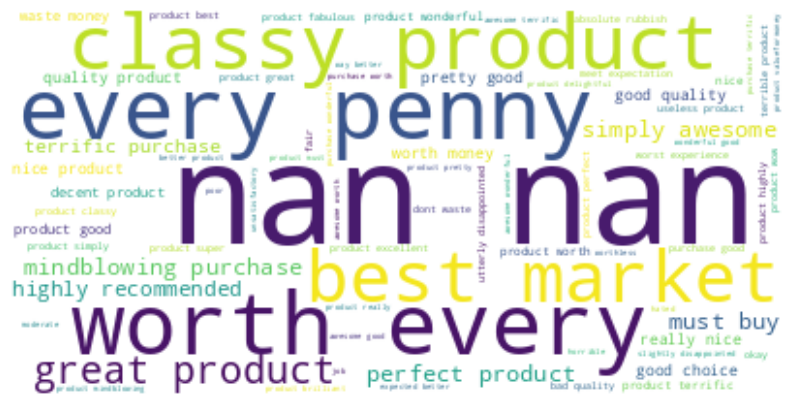

In [ ]:
#use a word cloud to visualize the most used words in the reviews column:

text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                     background_color="white").generate(text)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#Running Sentiment Intensity Analyser to the cleaned _text :

from tqdm.notebook import tqdm
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/189857 [00:00<?, ?it/s]

In [ ]:
#Converting a dict to datset and left joining both gthe dataset :

new_df = pd.DataFrame(res).T
new_df = new_df.reset_index().rename(columns={'index': 'Id'})
new_df = new_df.merge(df, how='right')
new_df.head()

,Id,neg,neu,pos,compound,ProductName,Rate,Review,cleaned_text,polarity,subjectivity,polarity_encoded
0,0,0.000,0.000,1.0,0.5994,candes l roompersonal air coolerÿÿwhite black...,5,super,GreatcoolerexcellentairflowandforthispriceItss...,0.333333,0.666667,positive
1,1,0.000,0.000,1.0,0.6249,candes l roompersonal air coolerÿÿwhite black...,5,awesome,Bestbudget2fitcoolerNicecooling,1.000000,1.000000,positive
2,2,0.000,0.000,1.0,0.3182,candes l roompersonal air coolerÿÿwhite black...,3,fair,Thequalityisgoodbutthepowerofairisdecent,0.700000,0.900000,positive
3,3,0.737,0.263,0.0,-0.4215,candes l roompersonal air coolerÿÿwhite black...,1,useless product,Verybadproductitsaonlyafan,-0.500000,0.200000,negative
4,4,0.000,0.000,1.0,0.3182,candes l roompersonal air coolerÿÿwhite black...,3,fair,Okokproduct,0.700000,0.900000,positive


In [ ]:
#dropping the subjectivity and polarity column for better accuracies :

new_df.drop(['subjectivity','polarity'],axis=1,inplace=True)
new_df.head()

,Id,neg,neu,pos,compound,ProductName,Rate,Review,cleaned_text,polarity_encoded
0,0,0.000,0.000,1.0,0.5994,candes l roompersonal air coolerÿÿwhite black...,5,super,GreatcoolerexcellentairflowandforthispriceItss...,positive
1,1,0.000,0.000,1.0,0.6249,candes l roompersonal air coolerÿÿwhite black...,5,awesome,Bestbudget2fitcoolerNicecooling,positive
2,2,0.000,0.000,1.0,0.3182,candes l roompersonal air coolerÿÿwhite black...,3,fair,Thequalityisgoodbutthepowerofairisdecent,positive
3,3,0.737,0.263,0.0,-0.4215,candes l roompersonal air coolerÿÿwhite black...,1,useless product,Verybadproductitsaonlyafan,negative
4,4,0.000,0.000,1.0,0.3182,candes l roompersonal air coolerÿÿwhite black...,3,fair,Okokproduct,positive


In [ ]:
df["Positive"] = [sia.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sia.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sia.polarity_scores(i)["neu"] for i in df["Review"]]

data = df[["Review","Positive","Negative","Neutral"]]
data.head()

,Review,Positive,Negative,Neutral
0,super,1.0,0.000,0.000
1,awesome,1.0,0.000,0.000
2,fair,1.0,0.000,0.000
3,useless product,0.0,0.737,0.263
4,fair,1.0,0.000,0.000


Text(0.5, 1.0, ' Visualize the data to understand the overall sentiment trends. ')

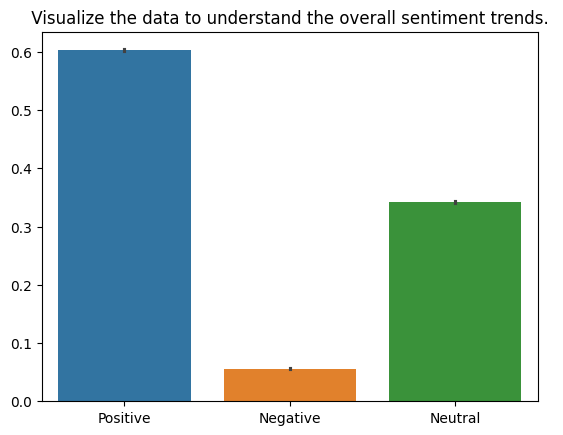

In [ ]:
# Visualize the data to understand the overall sentiment trends :


sns.barplot(data=data).set_title(" Visualize the data to understand the overall sentiment trends. ")

As we see there are more number of "POSITIVE" reviews than negative and neutral reviews.

In [ ]:
#Apply Vectorization :
df2=df[['Review','polarity_encoded']]
df2.head()

,Review,polarity_encoded
0,super,positive
1,awesome,positive
2,fair,positive
3,useless product,negative
4,fair,positive


In [ ]:
#Function to generate tokens using TweetTokenizer :

def tokenize(text):
  tk=TweetTokenizer()
  return tk.tokenize(text)

Vectorizer=CountVectorizer(analyzer='word',tokenizer=tokenize,lowercase=True,ngram_range=(1,1))


In [ ]:
#Generate unique words from the processed data by applying count vectorizer along with TweetTokenizer :

Count=Vectorizer.fit_transform(df2['Review'])
Count.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(189857, 1091)

FEATURE SELECTION :


In [ ]:
#LETS split the dataset into two parts :

X=df2['Review'].values
Y=df2['polarity_encoded'].values

#Train Test Split :

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(132899,)
(56958,)
(132899,)
(56958,)


In [ ]:
#Extract feature using TFIDF Vectorizer :

vect=TfidfVectorizer(max_features=1000)
X_train_idf=vect.fit_transform(X_train)
X_test_idf=vect.transform(X_test)


#Print idf values :

df_idf=pd.DataFrame(vect.idf_,index=vect.get_feature_names_out(),columns=['idf_weights'])
df_idf.sort_values(by=['idf_weights'],ascending=False)

,idf_weights
aboveaverage,12.104205
office,12.104205
move,12.104205
mw,12.104205
name,12.104205
...,...
purchase,3.869375
awesome,3.861054
good,3.379510
nan,3.208096


In [ ]:
# Perform Multinomial Naive Bayes Classification :
# Apply MultinomialNB on training data :

mnb = MultinomialNB()
mnb.fit(X_train_idf, Y_train)

# Predict polarity by fitting the model to testing data :

pred_mnb = mnb.predict(X_test_idf)

# Calculate accuracy of predicted values :

acc = accuracy_score(Y_test, pred_mnb)


results = pd.DataFrame([['Multinomial Naive Bayes', acc]],
               columns = ['Model', 'Accuracy'])

print(results)

                     Model  Accuracy
0  Multinomial Naive Bayes  0.992837


In [ ]:
# Perform Logistic Regression on the processed data and compare the accuracy score of both these models:


clf_rf = LogisticRegression()
clf_rf.fit(X_train_idf, Y_train)

# Predict using testing data :

y_pred_rf = clf_rf.predict(X_test_idf)

# Calculate accuracy :

acc = accuracy_score(Y_test, y_pred_rf)

model_results = pd.DataFrame([['Linear_Regression', acc]],
               columns = ['Model', 'Accuracy'])

results = results.append(model_results, ignore_index = True)
print(results)

                     Model  Accuracy
0  Multinomial Naive Bayes  0.992837
1        Linear_Regression  0.998929


<ipython-input-36-55f76f080270>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
# Perform SVM model on the processed data and compare the accuracy score of both these models :


svm = SVC()
svm.fit(X_train_idf, Y_train)

# Predict using testing data:

y_pred1 = svm.predict(X_test_idf)

# Calculate accuracy :

acc = accuracy_score(Y_test, y_pred1)

model_results = pd.DataFrame([['SVM', acc]],
               columns = ['Model', 'Accuracy'])

results = results.append(model_results, ignore_index = True)
print(results)

                     Model  Accuracy
0  Multinomial Naive Bayes  0.992837
1        Linear_Regression  0.998929
2                      SVM  0.999052


<ipython-input-37-57f845439db0>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

def analyze_sentiment(review):

    # Initialize VADER sentiment analyzer :
    sia = SentimentIntensityAnalyzer()

    # Get sentiment scores :

    sentiment_score = sia.polarity_scores(review)

    # Classify the sentiment:

    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Example usage :

review = input("Enter your review: ")
sentiment = analyze_sentiment(review)
print("Sentiment:", sentiment)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter your review: good
Sentiment: Positive
